In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline

Downloading the data...

In [2]:
speed_dating_download = pd.read_csv('Speed Dating Data.csv',encoding="latin-1")

In [3]:
speed_dating = speed_dating_download.copy()

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
print(speed_dating.shape)
print(speed_dating.iid.nunique())
speed_dating.head()

(8378, 195)
551


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [5]:
speed_dating.rename(columns={'pf_o_att': 'att_importance', 'pf_o_sin': 'sin_importance', 'pf_o_int': 'int_importance', 'pf_o_fun': 'fun_importance', 'pf_o_amb': 'amb_importance', 'pf_o_sha': 'sha_importance'}, inplace=True)

In [6]:
speed_dating.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,att_importance,sin_importance,int_importance,fun_importance,amb_importance,sha_importance,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,1

In [7]:
women_data = speed_dating.loc[speed_dating.gender == 0, :]
men_data = speed_dating.loc[speed_dating.gender == 1, :]

The number of NO vs YES... Women are definitely pickier... lol

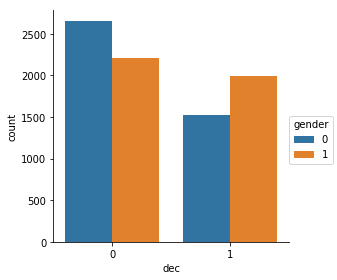

In [8]:
sns.factorplot(x="dec", hue='gender', data=speed_dating, 
               kind='count')

Breakdown by race...

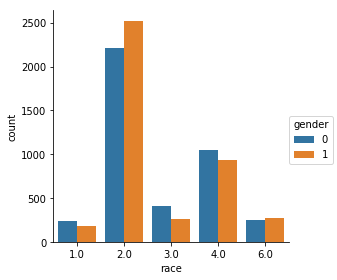

In [9]:
sns.factorplot(x='race', hue='gender', data=speed_dating, 
               kind='count')

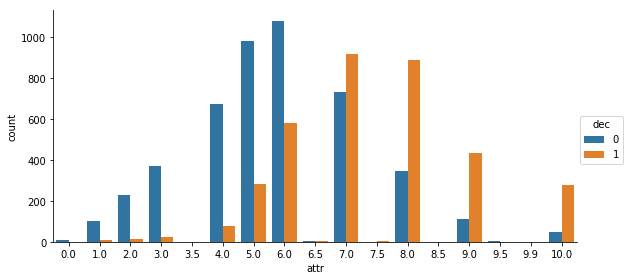

In [10]:
sns.factorplot(x='attr', hue='dec', data=speed_dating, aspect=2,
               kind='count', )

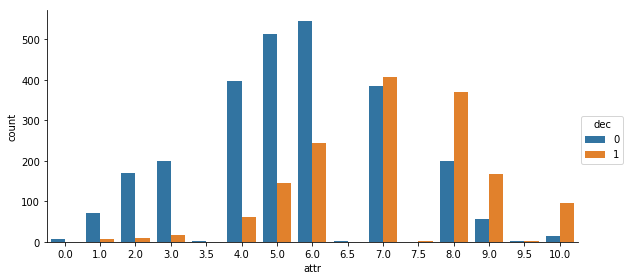

In [11]:
sns.factorplot(x='attr', hue='dec', data=women_data, aspect=2,
               kind='count')

Age spread... male vs female

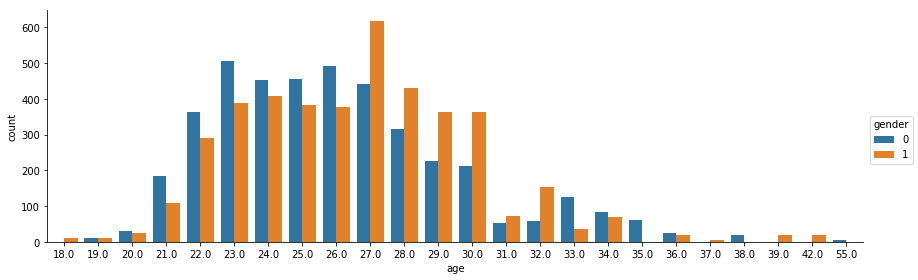

In [12]:
sns.factorplot(x="age", hue='gender', data=speed_dating, 
               kind='count', size=4, aspect=3)

How satisfied people were by the quality of people they met on a scale of 1-to-10...

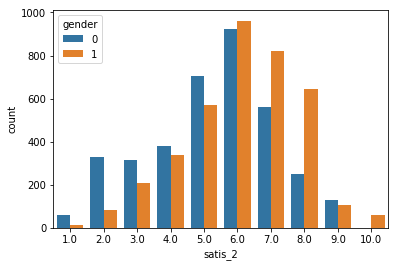

In [13]:
sns.countplot(x="satis_2", hue='gender', data=speed_dating)

Was the length of each meeting: 1 - Too short, 2 - Too long, 3 - Just right

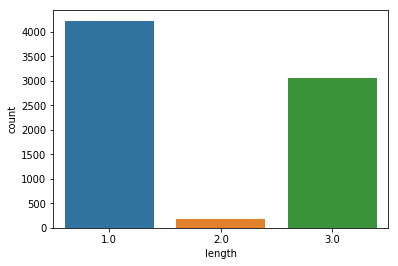

In [14]:
sns.countplot(x="length", data=speed_dating)

Was the number of dates: 1 - Too few, 2 - Too many, 3 - Just enough

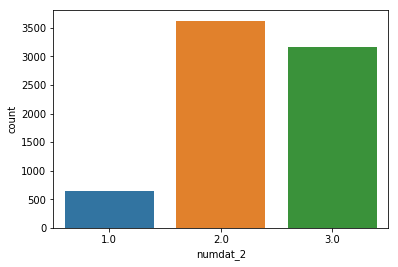

In [15]:
sns.countplot(x="numdat_2", data=speed_dating)

Percent of matches vs no matches

0.16491395793499045
0.20052581261950286
0.30975143403441685
0.32480879541108987


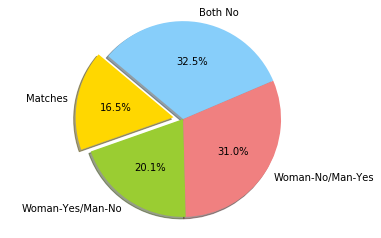

In [16]:
total = women_data.shape[0]
matches = women_data.loc[((women_data.dec_o == 1) & (women_data.dec == 1)),:].shape[0]
print(matches/total)

womanY_manN = women_data.loc[((women_data.dec_o == 0) & (women_data.dec == 1)),:].shape[0]
print(womanY_manN/total)

womanN_manY = women_data.loc[((women_data.dec_o == 1) & (women_data.dec == 0)),:].shape[0]
print(womanN_manY/total)

bothN = women_data.loc[((women_data.dec_o == 0) & (women_data.dec == 0)),:].shape[0]
print(bothN/total)

# Data to plot
labels = 'Matches', 'Woman-Yes/Man-No', 'Woman-No/Man-Yes', 'Both No'
sizes = [matches, womanY_manN, womanN_manY, bothN]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes,  explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

What's most important to you... everybody...

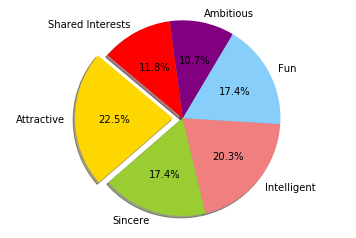

In [17]:
attr_sum = speed_dating.attr1_1.sum()
sinc_sum = speed_dating.sinc1_1.sum()
intell_sum = speed_dating.intel1_1.sum()
fun_sum = speed_dating.fun1_1.sum()
amb_sum = speed_dating.amb1_1.sum()
shar_sum = speed_dating.shar1_1.sum()

# Data to plot
labels = 'Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests'
sizes = [attr_sum, sinc_sum, intell_sum, fun_sum, amb_sum, shar_sum]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'red']
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes,  explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Attribute importance the day AFTER the event... As you can see... It changed significantly...

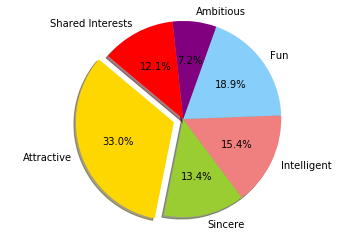

In [18]:
attr_sum = speed_dating.attr7_2.sum()
sinc_sum = speed_dating.sinc7_2.sum()
intell_sum = speed_dating.intel7_2.sum()
fun_sum = speed_dating.fun7_2.sum()
amb_sum = speed_dating.amb7_2.sum()
shar_sum = speed_dating.shar7_2.sum()

# Data to plot
labels = 'Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests'
sizes = [attr_sum, sinc_sum, intell_sum, fun_sum, amb_sum, shar_sum]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'red']
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes,  explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Percentages of important traits... Women

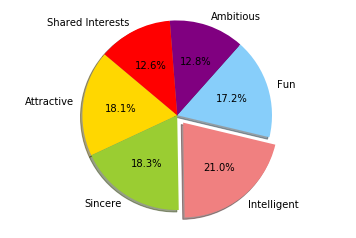

In [19]:
attr_sum = women_data.attr1_1.sum()
sinc_sum = women_data.sinc1_1.sum()
intell_sum = women_data.intel1_1.sum()
fun_sum = women_data.fun1_1.sum()
amb_sum = women_data.amb1_1.sum()
shar_sum = women_data.shar1_1.sum()

# Data to plot
labels = 'Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests'
sizes = [attr_sum, sinc_sum, intell_sum, fun_sum, amb_sum, shar_sum]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'red']
explode = (0, 0, 0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes,  explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

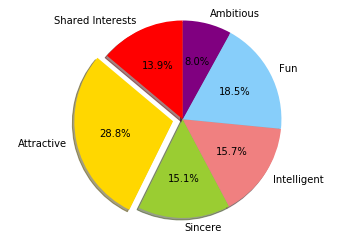

In [20]:
attr_sum = women_data.attr7_2.sum()
sinc_sum = women_data.sinc7_2.sum()
intell_sum = women_data.intel7_2.sum()
fun_sum = women_data.fun7_2.sum()
amb_sum = women_data.amb7_2.sum()
shar_sum = women_data.shar7_2.sum()

# Data to plot
labels = 'Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests'
sizes = [attr_sum, sinc_sum, intell_sum, fun_sum, amb_sum, shar_sum]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'red']
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes,  explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Most important traits... Male

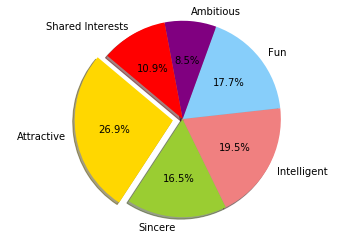

In [21]:
attr_sum = men_data.attr1_1.sum()
sinc_sum = men_data.sinc1_1.sum()
intell_sum = men_data.intel1_1.sum()
fun_sum = men_data.fun1_1.sum()
amb_sum = men_data.amb1_1.sum()
shar_sum = men_data.shar1_1.sum()

# Data to plot
labels = 'Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests'
sizes = [attr_sum, sinc_sum, intell_sum, fun_sum, amb_sum, shar_sum]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'red']
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes,  explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

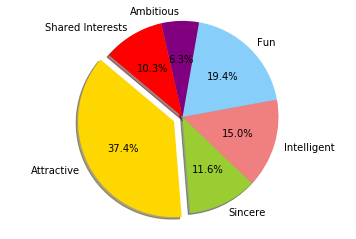

In [22]:
attr_sum = men_data.attr7_2.sum()
sinc_sum = men_data.sinc7_2.sum()
intell_sum = men_data.intel7_2.sum()
fun_sum = men_data.fun7_2.sum()
amb_sum = men_data.amb7_2.sum()
shar_sum = men_data.shar7_2.sum()

# Data to plot
labels = 'Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests'
sizes = [attr_sum, sinc_sum, intell_sum, fun_sum, amb_sum, shar_sum]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'red']
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes,  explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Percentage of yeses by race...

In [23]:
ethnicity_yes_average = []
for num in range(1, 5):
    ethnicity_yes_average.append(speed_dating.loc[((speed_dating.gender == 1) & (speed_dating.race == num)), :].dec_o.mean())

In [24]:
ethnicity_yes_average_women = []
for num in range(1, 5):
    ethnicity_yes_average_women.append(speed_dating.loc[((speed_dating.gender == 0) & (speed_dating.race == num)), :].dec_o.mean())

In [25]:
races = ['Black', 'White', 'Latino', 'Asian']

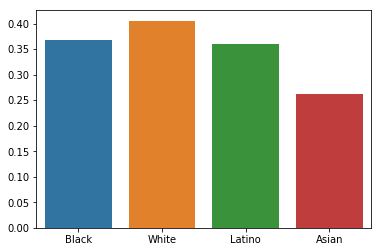

In [26]:
sns.barplot(x=races, y=ethnicity_yes_average)

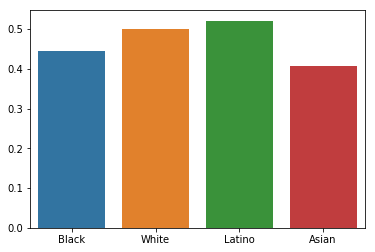

In [27]:
sns.barplot(x=races, y=ethnicity_yes_average_women)

The reasons why people went to the event....

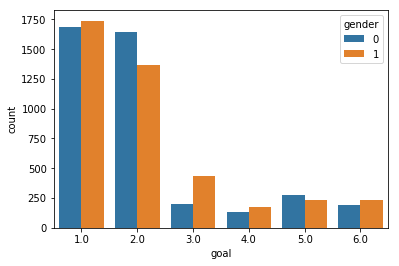

In [28]:
sns.countplot(x="goal", hue='gender', data=speed_dating)

For the following plots, I took an average of each person's scores and graphed it against their percentage of yeses. 

For the finished capstone, I'll definitely put them together as subplots and make it like the last plot with the gender color-coded.

In [29]:
men_scores_average = men_data.groupby(['pid'])['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'dec'].mean()

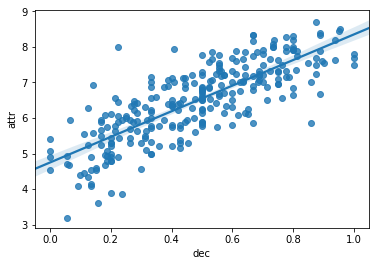

In [30]:
sns.regplot(x="dec", y="attr", data=men_scores_average)

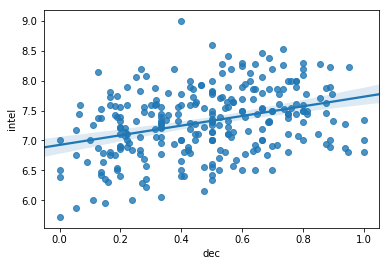

In [31]:
sns.regplot(x="dec", y="intel", data=men_scores_average)

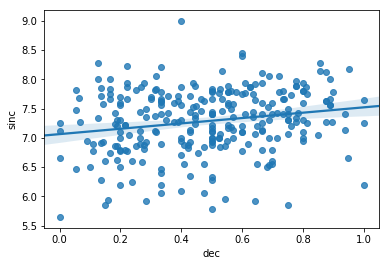

In [32]:
sns.regplot(x="dec", y="sinc", data=men_scores_average)

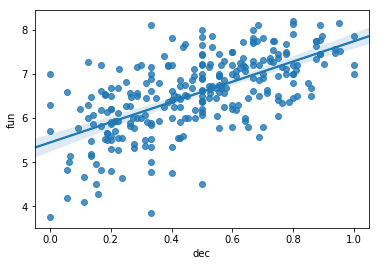

In [33]:
sns.regplot(x="dec", y="fun", data=men_scores_average)

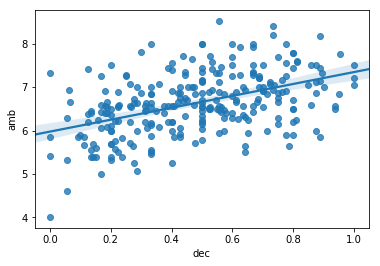

In [34]:
sns.regplot(x="dec", y='amb' , data=men_scores_average)

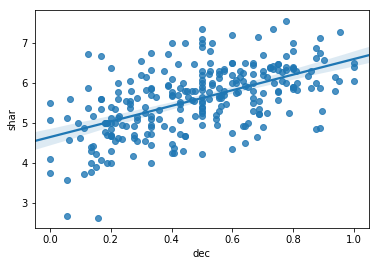

In [35]:
sns.regplot(x="dec", y="shar", data=men_scores_average)

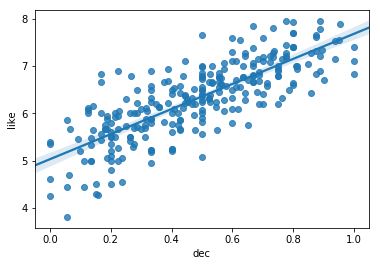

In [36]:
sns.regplot(x="dec", y="like", data=men_scores_average)

In [37]:
women_scores_average = women_data.groupby(['pid'])['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'dec'].mean()

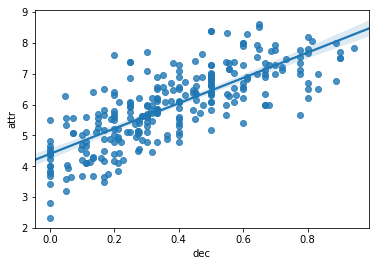

In [38]:
sns.regplot(x="dec", y="attr", data=women_scores_average)

In [80]:
score_averages = speed_dating.groupby(['pid'])['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'dec','gender','age_o','age'].mean().dropna()

In [81]:
score_averages.columns = pd.Series(['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'dec', 'gender',
       'age_o', 'age'], name = 'Atribute')

In [82]:
df = score_averages.loc[:,['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like']]

In [83]:
df = df.cumsum(axis=0).stack().reset_index(name="val")

In [85]:
df.head()

,pid,Atribute,val
0,1.0,attr,6.7
1,1.0,sinc,7.4
2,1.0,intel,8.0
3,1.0,fun,7.2
4,1.0,amb,8.0


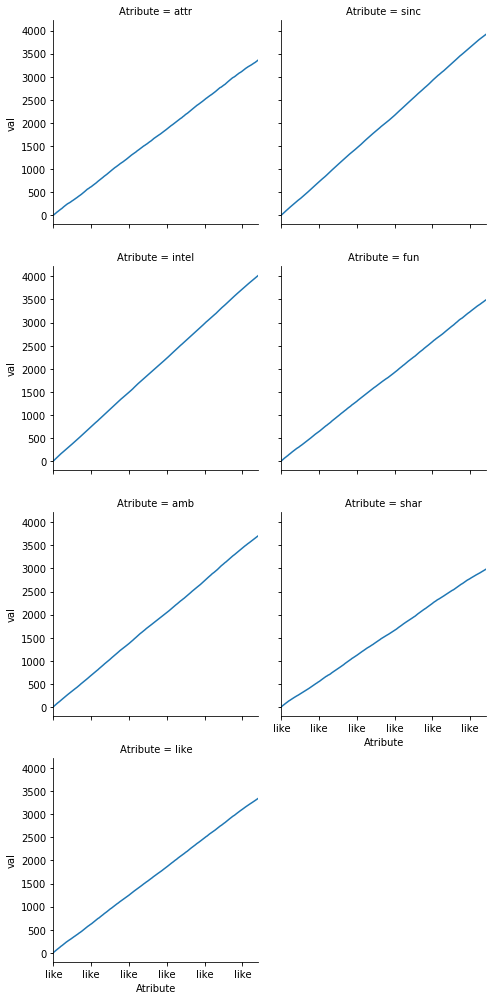

In [87]:
def dateplot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)
g = sns.FacetGrid(df, col="Atribute", col_wrap=2, size=3.5)
g = g.map_dataframe(dateplot, "Atribute", "val")

In [67]:
df = pd.DataFrame(
    data=np.random.randn(90, 4),
    columns=pd.Series(list("ABCD"), name="walk"),
    index=pd.date_range("2015-01-01", "2015-03-31",
                        name="date"))
print(np.random.randn(90, 4))
print(pd.Series(list("ABCD"), name="walk"))
print(pd.date_range("2015-01-01", "2015-03-31",
                        name="date"))
print(df)
df = df.cumsum(axis=0).stack().reset_index(name="val")
print(df)
# def dateplot(x, y, **kwargs):
#     ax = plt.gca()
#     data = kwargs.pop("data")
#     data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)
# g = sns.FacetGrid(df, col="walk", col_wrap=2, size=3.5)
# g = g.map_dataframe(dateplot, "date", "val")

[[ -1.13710291e+00  -1.78325350e+00  -1.60755047e+00  -1.80248806e+00]
 [  6.42104577e-01   1.13007666e-01  -2.67290107e-02   3.96650712e-01]
 [  1.14095047e-01   1.65376143e+00  -1.20512360e+00   4.18617197e-01]
 [ -1.03390568e-01  -6.17393010e-01  -5.06343274e-01   9.09684227e-01]
 [  1.10491521e+00  -2.65503343e-01   2.76763586e-01   2.02823397e+00]
 [  1.30619175e+00   5.47357173e-01  -1.20347683e+00   1.63136926e+00]
 [  8.14836018e-01  -1.06754747e+00  -9.54457720e-01   2.30124803e-01]
 [  1.91329135e+00  -1.72824534e-01   1.62721489e+00   4.01092319e-01]
 [  1.55867070e+00   5.35066674e-02   7.00293416e-01   8.36530662e-02]
 [  1.75577063e-01   5.26524167e-01  -1.11515116e+00   1.48184682e+00]
 [  2.90564489e-01   1.35302535e+00  -1.13336435e+00  -6.52814859e-01]
 [ -8.08488346e-01  -1.13880649e+00  -7.14788785e-01  -4.68795946e-02]
 [ -1.37590571e-01   9.88993985e-02  -5.47094400e-01   1.22590505e-01]
 [ -6.95011814e-01  -5.76152638e-01  -4.79133713e-01  -1.12005751e+00]
 [ -2.

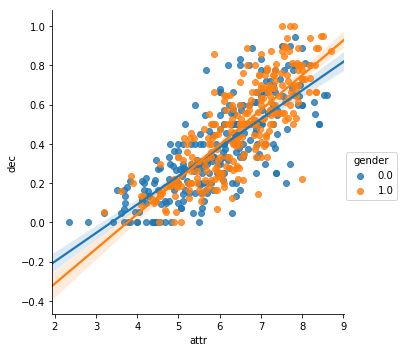

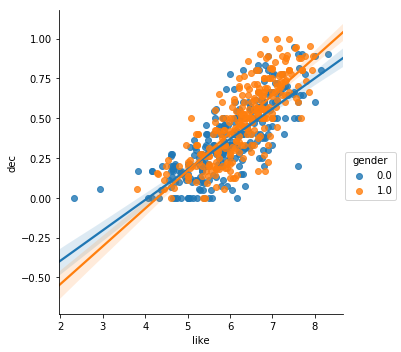

In [58]:

# fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.lmplot(x="attr",y="dec",  hue='gender', data=score_averages)
sns.lmplot(x="like", y="dec",  hue='gender', data=score_averages)
plt.show()


# sns.regplot(x=idx, y=df['x'], ax=ax1)
# sns.regplot(x=idx, y=df['y'], ax=ax2)

After all of that 'exploring', I'll go into my first predictive model. Just a simple linear regression... 

And FYI, I'm trying it out as a regression now with the target value being the percentage of yeses as opposed to a yes/no classifier. 

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Coefficients: 
 [[ 0.16122722]]
Intercept: 
 [-0.57377091]

R-squared:
0.631973408233


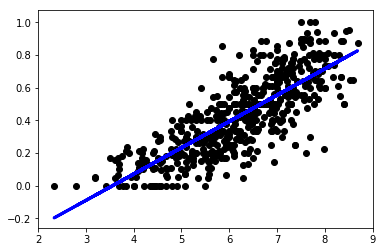

In [41]:
x = score_averages.attr.reshape(-1, 1)
y = score_averages.dec.reshape(-1, 1)

regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x, y))

# Plot outputs
plt.scatter(x, y, color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()

In [42]:
import statsmodels.api as sm

x_constant = sm.add_constant(x)

ols = sm.OLS(y, x_constant)
ols_result = ols.fit()
# Now you have at your disposition several error estimates, e.g.
print(ols_result.HC0_se)
# and covariance estimates
print(ols_result.cov_HC0)

ols_result.summary()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


[ 0.02947204  0.00491506]
[[  8.68601117e-04  -1.41780103e-04]
 [ -1.41780103e-04   2.41578212e-05]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     929.0
Date:                Wed, 29 Nov 2017   Prob (F-statistic):          1.60e-119
Time:                        00:25:55   Log-Likelihood:                 275.68
No. Observations:                 543   AIC:                            -547.4
Df Residuals:                     541   BIC:                            -538.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5738      0.033    -17.200      0.000      -0.639      -0.508
x1             0.1612      0.005     30.480      0.000       0.151       0.172
==============================================================================
Omnibus:                        2.584   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                2.662
Skew:                           0.054   Prob(JB):                        0.264
Kurtosis:                       3.326   Cond. No.                         34.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
ols_result.params

array([-0.57377091,  0.16122722])

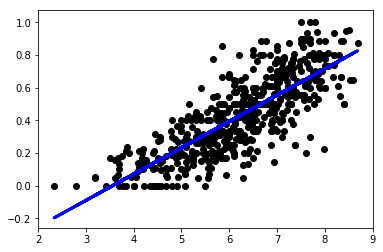

In [44]:
# Plot outputs
plt.scatter(x, y, color='black')
plt.plot(x, ols.predict(ols_result.params), color='blue', linewidth=3)
plt.show()

I'm going to drop all of the rows where the 'dec' was 0. Basically, all the people who got no yeses altogether!

In [45]:
at_least_1_yes = score_averages.loc[score_averages.attr >= 1, :]

Coefficients: 
 [[ 0.16122722]]
Intercept: 
 [-0.57377091]

R-squared:
0.631973408233


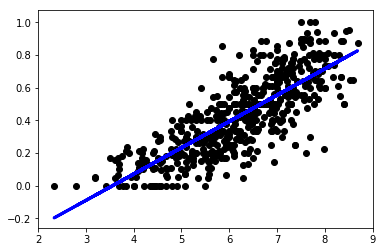

In [46]:
x = at_least_1_yes.attr.values.reshape(-1, 1)
y = at_least_1_yes.dec.values.reshape(-1, 1)

regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x, y))

# Plot outputs
plt.scatter(x, y, color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()

Then, I'll do a mult-variable regression. This one of course won't have a graph.

In [47]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
y = score_averages.dec.values.reshape(-1, 1)
x = score_averages[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','age_o','age']]
regr.fit(x, y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x, y))


Coefficients: 
 [[ 0.08706861 -0.03692789  0.00115311 -0.00482763 -0.00910491 -0.00206248
   0.13998545 -0.00230047  0.00284482]]

Intercept: 
 [-0.62782921]

R-squared:
0.692788886937


Here it is again, I did it this way as well to get the p-values...

In [48]:
linear_formula = 'dec ~ attr+sinc+intel+fun+amb+shar+like+age_o+age'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=score_averages).fit()

In [49]:
lm.params

Intercept   -0.627829
attr         0.087069
sinc        -0.036928
intel        0.001153
fun         -0.004828
amb         -0.009105
shar        -0.002062
like         0.139985
age_o       -0.002300
age          0.002845
dtype: float64

According to this, attractiveness is the most statistacally significant, followed by like, and then sincerity. The other features are not significant at all.

In [50]:
lm.pvalues

Intercept    4.164761e-08
attr         9.974458e-21
sinc         1.901052e-03
intel        9.429855e-01
fun          6.749688e-01
amb          4.016713e-01
shar         8.483179e-01
like         1.877601e-13
age_o        1.612635e-01
age          4.425976e-01
dtype: float64

In [51]:
lm.rsquared

0.69278888693660257

I just wish that I could get a score higher than 69%... :-/

Okay, I'd do more, but I'm already running late to meet my friend!

Chat with you later!!! :-P

In [52]:
speed_dating.iid.nunique()

551

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
regr_rf = RandomForestRegressor(max_depth=4, random_state=2)
regr_rf.fit(x, y)

y_rf = regr_rf.predict(x)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [55]:
print(regr_rf.score(x, y))

0.761825888919


In [56]:
from sklearn.naive_bayes import MultinomialNB

y = np.asarray(score_averages.dec, dtype="|S6")
x = score_averages[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','age_o','age']]

# Instantiate our model and store it in a new variable.
mnb = MultinomialNB()

# Fit our model to the data.
mnb.fit(x, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [57]:
print(mnb.score(x, y))

0.1197053407
